<a href="https://colab.research.google.com/github/JustmeLu/Tareas-automatizacionInicial/blob/main/2-Ejercicios/02-Prep-Datos-Metricas-Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/02-Prep-Datos-Metricas-Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Preparación de Datos y Métricas de Evaluación
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Luisa Guerrero &bull; 12/07/2025
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller veremos como aplicar diferentes técnicas para la carga y preparación de datos y las métricas de modelos.
   
Para eso necesitaremos las siguientes librerías:

In [34]:
# Paquetes necesarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, recall_score, f1_score
import numpy as np



---
## <font color='264CC7'> Lectura de Datos </font>


Primero, necesitas cargar el conjunto de datos "Boston house prices", que contiene información sobre el valor de las casas en diferentes áreas de Boston basado en múltiples factores. Este conjunto de datos está disponible para su descarga [aquí](https://raw.githubusercontent.com/rupakc/UCI-Data-Analysis/refs/heads/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.data); la descripción de las variables  de puede encontrar [aquí](https://github.com/rupakc/UCI-Data-Analysis/blob/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.names).

En los ejercicios de esta actividad, usaremos como variable objetivo para regresión "MEDV", que representa la mediana del valor de las casas en una zona de Boston (en miles de dólares, k$); y para clasificación, la variable "CHAS", que indica si la casa está cerca del río Charles (1) o no (0).

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos "boston house-prices dataset" y muestra:
<ul>
  <li>El número y nombre de los atributos.</li>
  <li>El número de filas del conjunto de datos.</li>
  <li>Verifica si hay "missing values" y en qué columnas.</li>
</ul>
</div>

In [3]:
# Cargar datos desde la URL
url = "https://raw.githubusercontent.com/rupakc/UCI-Data-Analysis/refs/heads/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.data"

columnas = [
    "CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD",
    "TAX","PTRATIO","B","LSTAT","MEDV"
]

df = pd.read_csv(url, sep="\s+", names=columnas)

# Número y nombre de atributos
print("Número de atributos:", len(df.columns))
print("Nombres de atributos:", df.columns.tolist())

# Número de filas
print("Número de filas:", df.shape[0])

# Missing values
print("\nMissing values por columna:")
print(df.isna().sum())


Número de atributos: 14
Nombres de atributos: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
Número de filas: 506

Missing values por columna:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-4121845830.py:9: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(url, sep="\s+", names=columnas)


---
## <font color='264CC7'> Análisis de los datos </font>

### <font color='264CC7'> Análisis estadístico básico </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Realiza un análisis estadístico básico:
<br>

<ul>
  <li>Variables categóricas:</li>
     <ul>
      <li>Calcula la frecuencia.</li>
      <li>Realiza un gráfico de barras.</li>
    </ul>
  <li>Variables numéricas:</li>
    <ul>
      <li>Calcula estadísticos descriptivos básicos como media, mediana, desviación estándar, entre otros.</li>
      <li>Realiza un histograma para las variables INDUS, AGE y MEDV.</li>
    </ul>
</ul>
    
<hr>
Sugerencia: Puedes usar la librería 'pandas' y sus funciones 'describe' y 'value_counts', así como las funciones 'bar' e 'hist' de matplotlib.
</div>


Frecuencia de CHAS:
CHAS
0    471
1     35
Name: count, dtype: int64


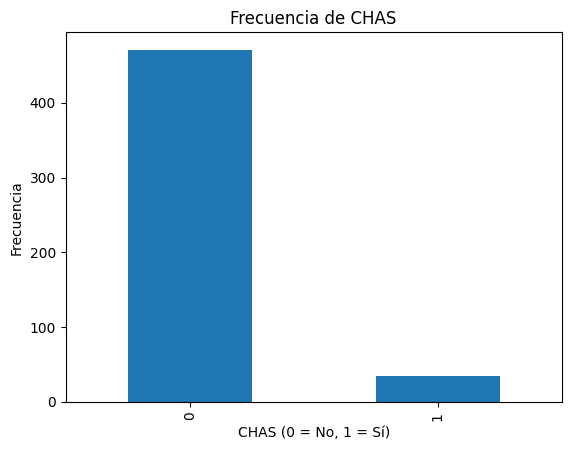


Estadísticos descriptivos de variables numéricas:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   1

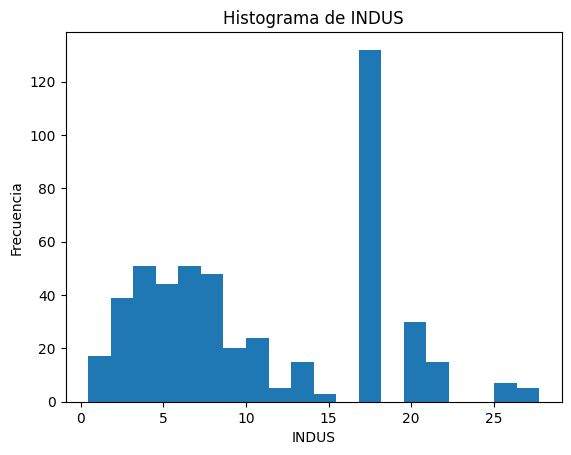

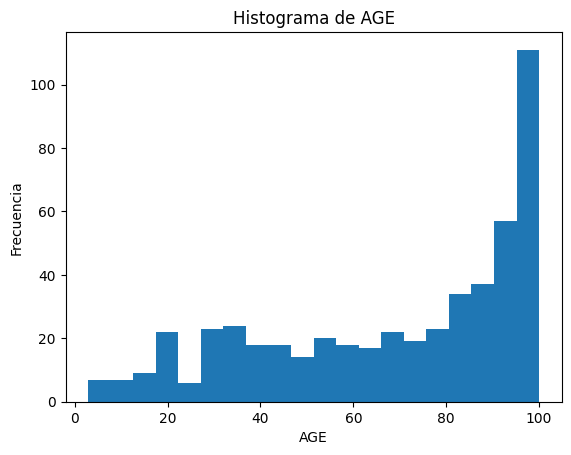

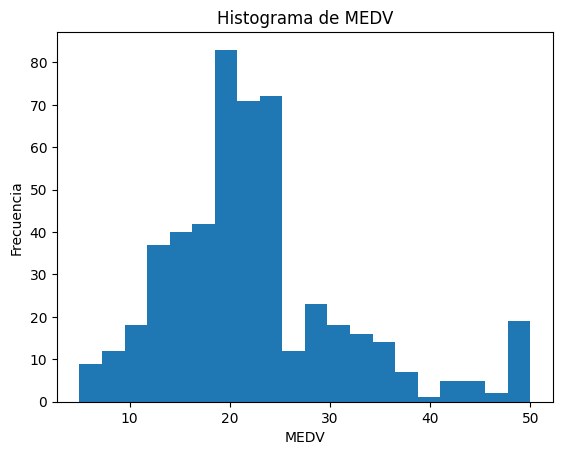

In [5]:
# VARIABLES CATEGÓRICAS (solo CHAS)
print("Frecuencia de CHAS:")
print(df["CHAS"].value_counts())

# Gráfico de barras para CHAS
df["CHAS"].value_counts().plot(kind='bar')
plt.title("Frecuencia de CHAS")
plt.xlabel("CHAS (0 = No, 1 = Sí)")
plt.ylabel("Frecuencia")
plt.show()

# VARIABLES NUMÉRICAS
print("\nEstadísticos descriptivos de variables numéricas:")
print(df.describe())

# Histogramas INDUS, AGE y MEDV
variables = ["INDUS", "AGE", "MEDV"]

for var in variables:
    plt.hist(df[var], bins=20)
    plt.title(f"Histograma de {var}")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    plt.show()


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
Comenta los resultados.
</div>

**MEDV:**
Se encontro que el precio promedio de las casas es de aproximadamente $22,530.
La mayoría de las casas se agrupan en precios bajos y medios. Aunque existen algunas casas muy caras que elevan el precio promedio.

El precio máximo de $50,000

**Proximidad al Río (CHAS) - Variable para Clasificación**
Esta variable indica si la propiedad está cerca del río Charles (Sí=1) o no (No=0).

Existe un desbalance, solo 35 de las 506 casas están cerca del río.

Esta variable está muy desbalanceada. Si se intenta predecir esta variable, el modelo tendrá muy poca información sobre la categoría "Sí", lo que podría llevar a predicciones sesgadas.

**Antigüedad de las Viviendas (AGE)**
La gran mayoría de las áreas residenciales en este conjunto de datos se componen de viviendas antiguas.


Más del 75% de las áreas tienen al menos la mitad de sus viviendas construidas antes de 1940.

**La variable INDUS** (proporción de acres de negocios no minoristas) dice que, en promedio, las áreas tienen una proporción industrial moderada, pero existe una fuerte asimetría. La mediana (9.69%) es menor que la media, lo que puede significar
 que hay un grupo de áreas altamente industrializadas (el valor máximo es 27.74%) que tiran del promedio hacia arriba.

### <font color='264CC7'> Análisis exploratorio de los datos </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Realiza un gráfico del histograma de valores de la variable MEDV, separado por los posibles valores de CHAS. Para comparar mejor los valores de MEDV según las diferentes clases de CHAS, los histogramas deben estar sobrepuestos. Agrega una leyenda para identificar a qué clase corresponde cada histograma.
    
El objetivo es observar cómo se distribuye el valor de la respuesta MEDV en función de la clase CHAS, para identificar visualmente si este atributo categórico está relacionado con diferentes valores de la respuesta.
    
<hr>
Sugerencia: Usa la función "hist" de la librería "matplotlib", utilizando el parámetro "alpha" para que se aprecien los histogramas sobrepuestos.<br>
Sugerencia: Para una mejor comparación, considera representar la densidad de probabilidad en lugar del número de entradas por bin. Esto permite usar la misma escala para cada clase y facilita la comparación. Puedes usar el parámetro "density" de la misma función "hist".  
</div>

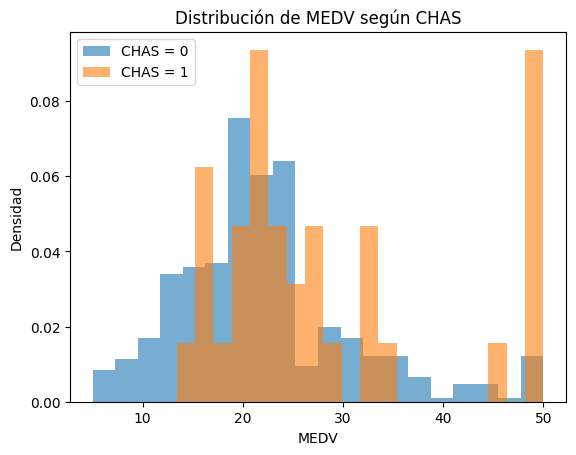

In [6]:
# Separación por clases de CHAS
medv_chas_0 = df[df["CHAS"] == 0]["MEDV"]
medv_chas_1 = df[df["CHAS"] == 1]["MEDV"]

plt.hist(medv_chas_0, bins=20, alpha=0.6, density=True, label="CHAS = 0")
plt.hist(medv_chas_1, bins=20, alpha=0.6, density=True, label="CHAS = 1")

plt.title("Distribución de MEDV según CHAS")
plt.xlabel("MEDV")
plt.ylabel("Densidad")
plt.legend()
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Mirando los histogramas, ¿te parece que el atributo CHAS tendrá algún peso a la hora de predecir la mediana del precio de las casas, MEDV? ¿Porqué?
</div>

En promedio, las casas ubicadas cerca del río Charles (CHAS = 1) tienden a tener un valor mediano más alto que las que no lo están (CHAS = 0). La proximidad al río parece ser un factor que aumenta el valor de la propiedad.

Esto puede significar que la variable CHAS si puede ser un predictor importante para la regresión y para predecir MEDV.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Calcula y muestra la correlación entre todos los atributos numéricos y la variable respuesta MEDV.
</div>


In [7]:
# Correlación de todos los atributos numéricos con MEDV
correlaciones = df.corr(numeric_only=True)["MEDV"].sort_values(ascending=False)
print(correlaciones)


MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


**Relación Fuerte y Positiva **  (Los que Aumentan el Valor): El atributo que se correlaciona de manera más fuerte y positiva es RM (0.695), el número promedio de habitaciones lo que indica que cuantas más habitaciones tiene una casa, mayor es su valor.

**Relación Fuerte y Negativa** (Los que Reducen el Valor): La correlación más fuerte y negativa es con LSTAT (-0.738), el porcentaje de población de bajo estatus. Esto significa que cuanto mayor es el porcentaje de población de bajo estatus en un área, menor es el valor de las casas.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Representa gráficamente las relaciones entre todas las parejas de variables numéricas (sin incluir la variable respuesta) del conjunto de datos. El objetivo de este ejercicio es observar y analizar gráficamente las correlaciones entre las variables.
<hr>Sugerencia: Puedes usar la función "pairplot" de la librería 'seaborn'.
</div>


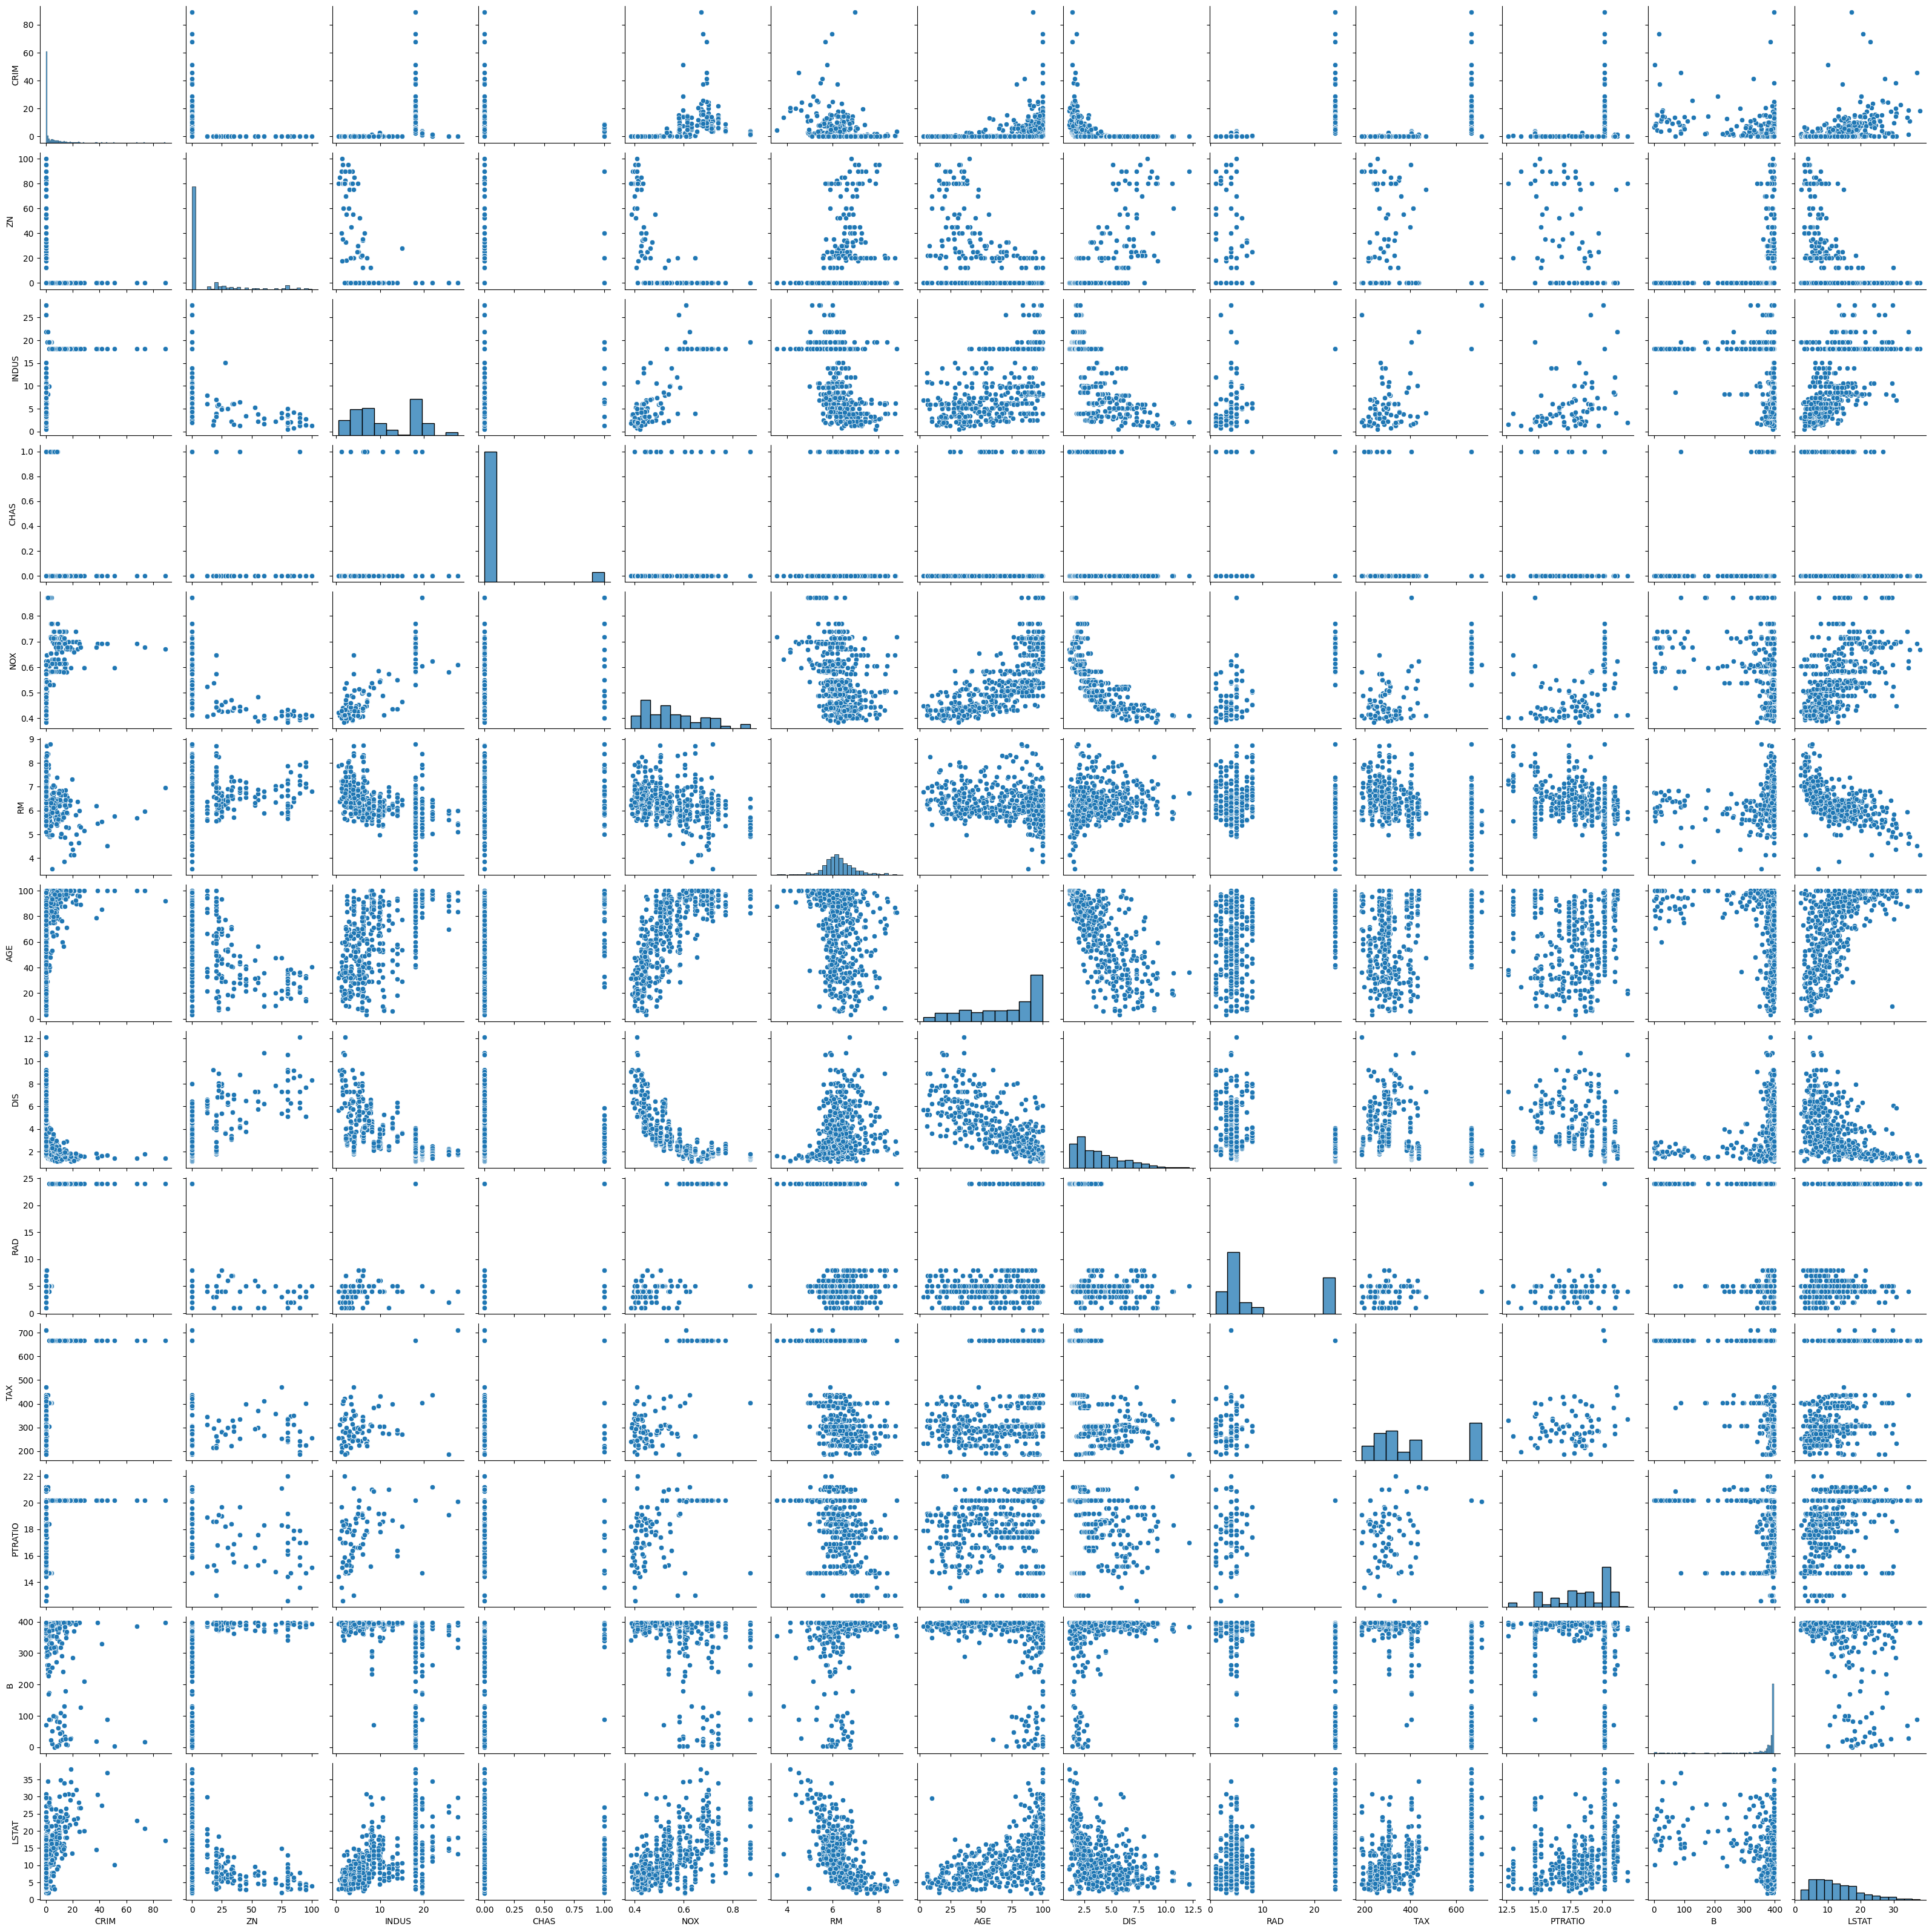

In [9]:
# Todas las variables numéricas excepto la respuesta MEDV
vars_numericas = df.drop(columns=["MEDV"])

# Pairplot
sns.pairplot(vars_numericas)
plt.show()

**TAX vs RAD:** Las zonas con una alta tasa de impuestos sobre la propiedad están casi siempre asociadas con una gran accesibilidad a las principales carreteras radiales. Esto sugiere que una de ellas debe ser excluida del modelo para evitar problemas de inestabilidad.

**INDUS vs NOX:** Cuanto mayor es la proporción de suelo dedicada a fábricas y almacenes (INDUS), mayor es la concentración de óxidos nítricos (NOX). La industrialización es una causa directa de la contaminación en la zona.

**DIS vs NOX:** Cuanto más lejos está un área de los principales centros de empleo (DIS es alta), menor es su nivel de contaminación (NOX). Esto subraya que la contaminación se concentra cerca de las zonas de mayor actividad laboral/industrial.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Identifica los 2 atributos con la correlación más fuerte con la variable respuesta y los 2 con la correlación más débil (considerando el valor absoluto del coeficiente de correlación).
    
Para analizar las correlaciones gráficamente, representa, para cada uno de los 4 atributos identificados, un scatter plot con el atributo en el eje x y la respuesta en el eje y. Además, añade en cada gráfico una regresión lineal que ajuste los puntos.
        
<hr>Sugerencia: Puedes usar la función "regplot" de la librería 'seaborn'.
</div>


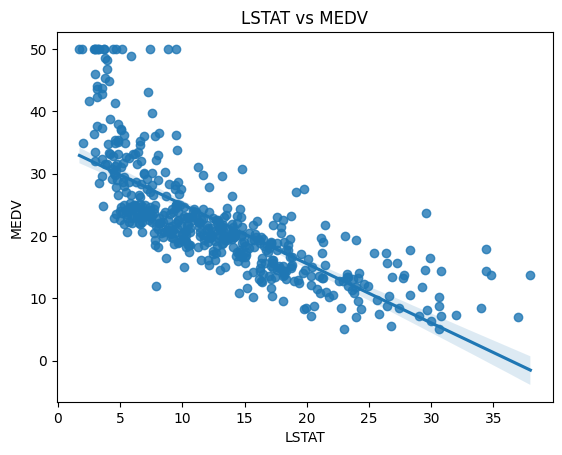

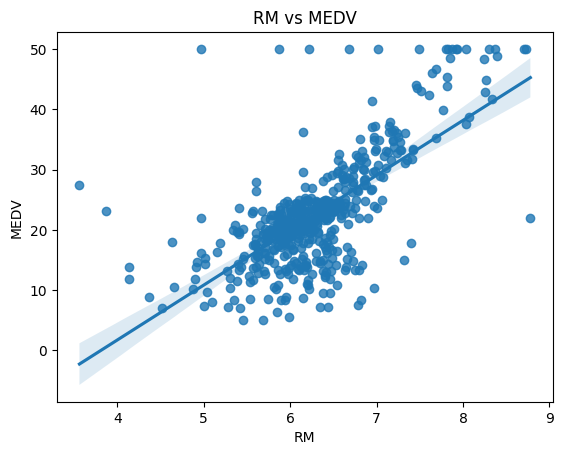

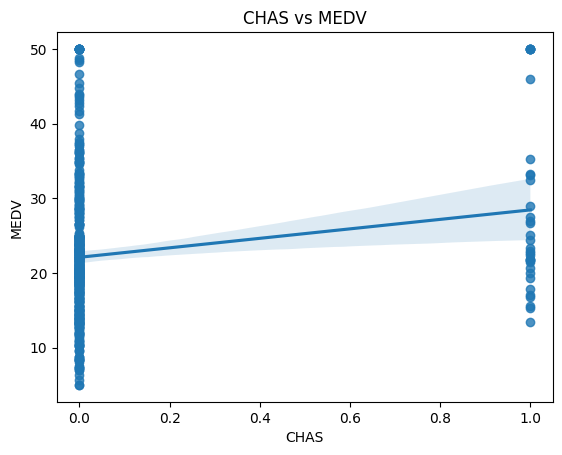

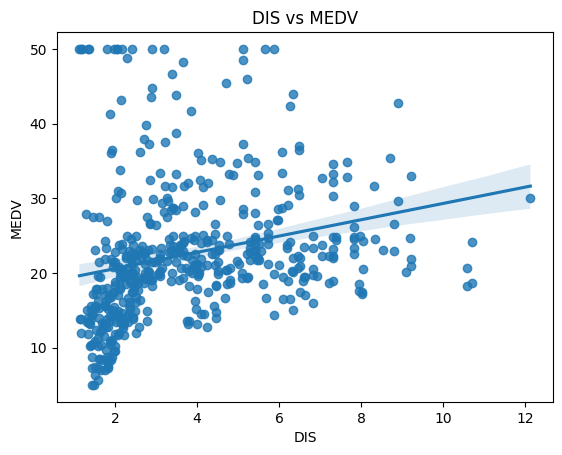

In [11]:
# Obtener correlaciones con MEDV
corrs = df.corr(numeric_only=True)["MEDV"].drop("MEDV")

# 2 más fuertes y 2 más débiles (por valor absoluto)
fuertes = corrs.abs().sort_values(ascending=False).head(2).index.tolist()
debiles = corrs.abs().sort_values(ascending=True).head(2).index.tolist()

atributos = fuertes + debiles

# Graficar scatter + regresión lineal
for attr in atributos:
    sns.regplot(x=df[attr], y=df["MEDV"])
    plt.title(f"{attr} vs MEDV")
    plt.xlabel(attr)
    plt.ylabel("MEDV")
    plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Observando los gráficos, comenta brevemente si logras visualizar las correlaciones altas o bajas que identificaste numéricamente.
</div>


 Los atributos con correlación fuerte (LSTAT y RM) muestran que sus puntos se agrupan de manera compacta alrededor de la línea de regresión: LSTAT presenta una pendiente negativa marcada, indicando que un aumento en el bajo estatus reduce drásticamente el valor, mientras que RM muestra una pendiente positiva clara, confirmando que el número de habitaciones aumenta precio.

---
## <font color='264CC7'> Reducción de la dimensionalidad </font>


En este ejercicio aplicaremos métodos de reducción de dimensionalidad al conjunto original de datos. El objetivo es reducir el número de atributos a un nuevo conjunto con menos dimensiones, pero que conserven la máxima información posible presente en los atributos originales.


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Aplica el método de reducción de dimensionalidad Principal Component Analysis (PCA) para reducir a 2 dimensiones el dataset original que contiene todos los atributos.</li>
    <li>Genera un gráfico con el resultado del PCA, mostrando los valores de las dos componentes principales en los ejes x e y, y utilizando una escala de colores para representar el valor de la respuesta MEDV. El objetivo es visualizar cómo varía MEDV en función de las componentes principales generadas.</li>
</ul>
    
NOTA: Asegúrate de no incluir la variable objetivo "MEDV" en la reducción de dimensionalidad. Queremos explicar la variable objetivo en función del resto de variables reducidas a dos dimensiones.

<hr>
Sugerencia: No necesitas programar el algoritmo de PCA desde cero, puedes usar la implementación disponible en la librería "scikit-learn".<br>
Sugerencia: Para el gráfico, utiliza el scatter plot de matplotlib con el parámetro "c" para asignar los colores de los puntos según los valores de la variable objetivo.
</div>


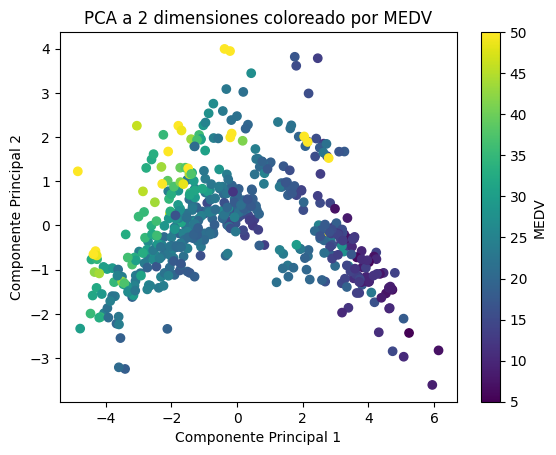

In [13]:
# Datos sin la variable objetivo
X = df.drop(columns=["MEDV"])
y = df["MEDV"]

# Estandarización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA a 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Gráfico
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="viridis")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PCA a 2 dimensiones coloreado por MEDV")
plt.colorbar(label="MEDV")
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Aplica la reducción de dimensionalidad usando TSNE. Puedes encontrar más información sobre este algoritmo en el siguiente enlace: <a href="https://distill.pub/2016/misread-tsne">https://distill.pub/2016/misread-tsne/</a></li>
    <li>Al igual que antes, genera un gráfico con el resultado del TSNE, mostrando en los ejes x e y los valores de las 2 nuevas dimensiones, y utiliza una escala de colores para representar el valor de la respuesta MEDV.</li>
</ul>

<hr>
Sugerencia: No necesitas programar el algoritmo TSNE desde cero, puedes usar la implementación disponible en la librería "scikit-learn".<br>
Sugerencia: Además de especificar el número de componentes, experimenta con los parámetros "learning_rate" y "perplexity".<br>
Sugerencia: Para el gráfico, utiliza el scatter plot de matplotlib con el parámetro "c" para asignar los colores de los puntos según los valores de la variable objetivo.
</div>


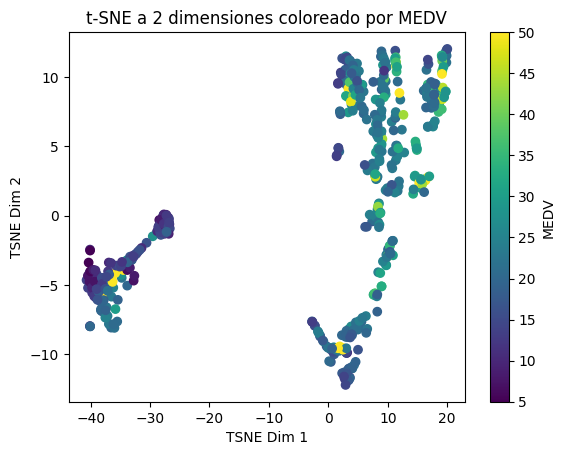

In [22]:
# Datos sin la variable objetivo
X = df.drop(columns=["MEDV"])
y = df["MEDV"]

# TSNE
tsne = TSNE(n_components=2, learning_rate=400, perplexity=50, random_state=0)
X_tsne = tsne.fit_transform(X)

# Gráfico
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap="viridis")
plt.xlabel("TSNE Dim 1")
plt.ylabel("TSNE Dim 2")
plt.title("t-SNE a 2 dimensiones coloreado por MEDV")
plt.colorbar(label="MEDV")
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Observando los dos gráficos, ¿consideras que la reducción de dimensionalidad ha funcionado adecuadamente? ¿Crees que las 2 nuevas dimensiones logran explicar la variación de MEDV y permiten visualizar de manera diferenciada los precios altos y bajos? Si utilizáramos las 2 nuevas variables para predecir MEDV, ¿con cuál de los dos métodos de reducción de dimensionalidad (PCA o TSNE) obtendríamos mejores resultados?
    
¿Por qué crees que obtenemos resultados tan diferentes entre ambos métodos?
</div>


La reducción de dimensionalidad a dos dimensiones logra diferenciar la variación de MEDV, pero con distinta eficacia según el método. t-SNE es el que mejor funciona visualmente, creando agrupaciones (clusters) mucho más nítidas para los precios bajos (morado), separándolos claramente de los precios altos (amarillo). Esto demuestra que sus dos dimensiones logran capturar la estructura local de los datos que define el valor de la vivienda. Por el contrario, PCA logra una diferenciación más general, mostrando un gradiente de color a lo largo de su Componente Principal 1, pero con un agrupamiento menos preciso. Si el objetivo fuera la predicción lineal de MEDV, probablemente se obtendrían mejores resultados con las componentes de PCA, ya que este método prioriza la varianza global y la linealidad, lo que es más adecuado para la regresión. Los resultados son tan diferentes porque PCA es un método lineal que busca la mejor proyección recta de los datos, mientras que t-SNE es un método no lineal que prioriza la preservación de las relaciones de vecindad local, siendo superior para la visualización de clusters.

---
## <font color='264CC7'> Entrenamiento y test </font>

En este último ejercicio se trata de aplicar un método de aprendizaje supervisado, concretamente el Linear Regression y K-means, para predecir las variables MEDV y CHAS, resectivamente, y evaluar la precisión obtenida con los modelo. Para eso usaremos:
<ul>
    <li>El conjunto de datos original con todos los atributos</li>
    <li>El conjunto de datos reducido a sólo 2 atributos con PCA</li>
</ul>

Divide los datos en dos conjuntos: uno para entrenamiento y otro para prueba y visualiza la dimensión de cada conjunto. Usar `random_state` igual al últmo número de tu cédula.

### <font color='264CC7'> Regresión </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Usando el conjunto de datos original:
    
<ul>
    <li>Divide el dataset en train y test.</li>
    <li>Define un modelo Linear Regression.</li>
    <li>Aplica validación cruzada con el modelo definido y el dataset de train (con cv=5 es suficiente).</li>
    <li>Como métricas para cuantificar el error del modelo, utiliza R2 (coeficiente de determinación) y MAE (media del error absoluto) separadamente.</li>
    <li>Calcula la media y la desviación estándar del error obtenido en cada caso.</li>
</ul>
    
<hr>
Sugerencia: Para aplicar validación cruzada, utiliza 'cross_val_score' de sklearn y modifica su parámetro 'scoring' si es necesario.<br>
</div>


In [26]:

# ===============================
# 1. Dividir datos en train/test
# ===============================
X = df.drop(columns=["MEDV"])
y = df["MEDV"]

random_state = 6

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=random_state
)

# ===============================
# 2. Modelo Linear Regression
# ===============================
model = LinearRegression()

# ===============================
# 3. Validación cruzada con R2
# ===============================
scores_r2 = cross_val_score(model, X_train, y_train, cv=5, scoring="r2")

# ===============================
# 4. Validación cruzada con MAE
# ===============================
mae_scorer = make_scorer(mean_absolute_error)
scores_mae = cross_val_score(model, X_train, y_train, cv=5, scoring=mae_scorer)

# ===============================
# 5. Resultados
# ===============================
print("Resultados R2:")
print("Media:", scores_r2.mean())
print("Desviación estándar:", scores_r2.std())

print("\nResultados MAE:")
print("Media:", scores_mae.mean())
print("Desviación estándar:", scores_mae.std())


Resultados R2:
Media: 0.715975174453227
Desviación estándar: 0.05012379273295684

Resultados MAE:
Media: 3.4416449425606013
Desviación estándar: 0.28567398855578874


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Repite el mismo procedimiento que en el ejercicio anterior, pero utilizando el dataset reducido a 2 dimensiones con PCA.
</div>


In [29]:
# ===============================
# 1. Preparar datos y aplicar PCA
# ===============================
X = df.drop(columns=["MEDV"])
y = df["MEDV"]

# Estandarizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# ===============================
# 2. Dividir en train/test
# ===============================
random_state = 6

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=random_state
)

# ===============================
# 3. Modelo Linear Regression
# ===============================
model = LinearRegression()

# ===============================
# 4. Validación cruzada con R2
# ===============================
scores_r2_pca = cross_val_score(model, X_train_pca, y_train_pca, cv=5, scoring="r2")

# ===============================
# 5. Validación cruzada con MAE
# ===============================
mae_scorer = make_scorer(mean_absolute_error)
scores_mae_pca = cross_val_score(model, X_train_pca, y_train_pca, cv=5, scoring=mae_scorer)

# ===============================
# 6. Resultados
# ===============================
print("Resultados PCA - R2:")
print("Media:", scores_r2_pca.mean())
print("Desviación estándar:", scores_r2_pca.std())

print("\nResultados PCA - MAE:")
print("Media:", scores_mae_pca.mean())
print("Desviación estándar:", scores_mae_pca.std())

Resultados PCA - R2:
Media: 0.44996078162555986
Desviación estándar: 0.06838677513250598

Resultados PCA - MAE:
Media: 4.909281381127425
Desviación estándar: 0.2555566270935619


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Con qué datos ha funcionado mejor el modelo? ¿Tiene sentido el resultado? ¿Está alineado con los resultados observados en el ejercicio 3?
</div>


El modelo de Regresión Lineal funcionó mucho mejor con el conjunto de datos original ($R^2=0.716$; MAE 3.442), lo cual tiene sentido y está alineado con los resultados de PCA. El rendimiento fue superior porque el modelo original utiliza la información completa, lo que permite capturar toda la complejidad y las relaciones lineales para predecir MEDV. Por el contrario la reducción de dimensionalidad a solo 2 componentes de PCA causó una pérdida de capacidad explicativa, resultando en un $R^2$ mucho más bajo ($0.450$) y un MAE mucho mayor (4.909). Esto confirma visualmente lo observado en el ejercicio de PCA: aunque las dos componentes principales mostraban una tendencia, no lograban retener suficiente varianza para una predicción precisa.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Con el mejor modelo que hayas obtenido:
    
<ul>
  <li>Genera predicciones sobre el dataset de test.</li>
  <li>Calcula la precisión de las predicciones obtenidas usando R2 (coeficiente de determinación) y MAE (media del error absoluto).</li>
</ul>

<hr>
Sugerencia: Para calcular R2 y MAE, utiliza las funciones disponibles en el módulo "metrics" de sklearn.
</div>


In [33]:
# ===============================
# 1. Datos completos (sin PCA)
# ===============================
X = df.drop(columns=["MEDV"])
y = df["MEDV"]

random_state = 6

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=random_state
)

# ===============================
# 2. Modelo Linear Regression
# ===============================
model = LinearRegression()
model.fit(X_train, y_train)

# ===============================
# 3. Predicciones sobre el test
# ===============================
y_pred = model.predict(X_test)

# ===============================
# 4. Métricas: R2 y MAE
# ===============================
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R2 en Test:", r2)
print("MAE en Test:", mae)

R2 en Test: 0.6839026890069024
MAE en Test: 3.8112195840097494


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Cuál de las dos métricas propuestas para evaluar los modelos (R2 o MAE) usarías para explicar la calidad del modelo a un ejecutivo de una inmobiliaria? ¿Y cuál usarías para explicarlo a un analista matemático de la misma compañía? ¿Por qué?  
</div>


1. Para el Ejecutivo de Inmobiliaria
Usaria el Error Absoluto Medio (MAE)

 El MAE se expresa en las mismas unidades que la variable objetivo ($k$). Al decirle al ejecutivo que el MAE es, por ejemplo, ($3,811), él puede evaluar directamente el riesgo económico asociado a la predicción. No hay necesidad de explicar conceptos estadísticos como varianza o bondad de ajuste.




2. Para el Analista Matemático ($R^2$)

Usaria el Coeficiente de Determinación ($R^2$)

El $R^2$ es una métrica estándar de bondad de ajuste en regresión. Mide qué tan bien se ajusta la línea de regresión a los datos, en una escala de 0 a 1. El analista valorará que el $R^2$ de $0.68$ es una medida  de que el 68% de la varianza en los precios se atribuye a los predictores del modelo y que no son al azar. Esto evalúa la calidad modelo.

### <font color='264CC7'> Clasificación </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Usando el conjunto de datos original:
    
<ul>
    <li>Divide el dataset en train y test.</li>
    <li>Define un modelo K-means.</li>
    <li>Como métricas para cuantificar el error del modelo, utiliza la precisión, la sensibilidad y f1-score.</li>
</ul>



In [35]:

# ===============================
# 1. Datos completos
# ===============================
X = df.drop(columns=["CHAS"])
y = df["CHAS"]

random_state = 6

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=random_state
)

# ===============================
# 2. Modelo K-means (2 clusters)
# ===============================
kmeans = KMeans(n_clusters=2, random_state=random_state)
kmeans.fit(X_train)

# ===============================
# 3. Predicción de clusters
# ===============================
y_pred_clusters = kmeans.predict(X_test)

# ===============================
# 4. Alinear clusters con la clase CHAS
#    (porque k-means no sabe cuál cluster es el 0 o el 1)
# ===============================

# cluster 0 ¿corresponde a clase 0 o clase 1?
cluster0_class = np.round(np.mean(y_train[kmeans.labels_ == 0]))

# construcción del mapa cluster → clase
mapping = {0: cluster0_class, 1: 1 - cluster0_class}

# aplicar mapping a las predicciones
y_pred = np.array([mapping[c] for c in y_pred_clusters])

# ===============================
# 5. Métricas: accuracy, recall, F1
# ===============================
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Sensibilidad (Recall):", recall)
print("F1-score:", f1)


Accuracy: 0.6470588235294118
Sensibilidad (Recall): 0.2222222222222222
F1-score: 0.1


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Repite el mismo procedimiento que en el ejercicio anterior, pero utilizando el dataset reducido a 2 dimensiones con PCA.
</div>


In [37]:
# ===============================
# 1. Preparar datos
# ===============================
X = df.drop(columns=["CHAS"])
y = df["CHAS"]

# Estandarizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

random_state = 6

# División train/test
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=random_state
)

# ===============================
# 2. Modelo K-means
# ===============================
kmeans_pca = KMeans(n_clusters=2, random_state=random_state)
kmeans_pca.fit(X_train_pca)

# ===============================
# 3. Predicción de clusters
# ===============================
y_pred_clusters_pca = kmeans_pca.predict(X_test_pca)

# ===============================
# 4. Alinear clusters con las clases reales
# ===============================

cluster0_class = np.round(np.mean(y_train_pca[kmeans_pca.labels_ == 0]))
mapping_pca = {0: cluster0_class, 1: 1 - cluster0_class}

y_pred_pca = np.array([mapping_pca[c] for c in y_pred_clusters_pca])

# ===============================
# 5. Métricas
# ===============================
accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)
recall_pca = recall_score(y_test_pca, y_pred_pca)
f1_pca = f1_score(y_test_pca, y_pred_pca)

print("Accuracy (PCA):", accuracy_pca)
print("Sensibilidad / Recall (PCA):", recall_pca)
print("F1-score (PCA):", f1_pca)

Accuracy (PCA): 0.5490196078431373
Sensibilidad / Recall (PCA): 0.3333333333333333
F1-score (PCA): 0.11538461538461539


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Cuál de las dos métricas propuestas para evaluar los modelos (precisión, sensibilidad o f1-score) usarías para explicar la calidad del modelo a un ejecutivo de una inmobiliaria? ¿Y cuál usarías para explicarlo a un analista matemático de la misma compañía? ¿Por qué? ¿El modelo es mejor discriminando o acertando? ¿Cómo se interpreta esto último?


**Para un ejecutivo inmobiliario**

La métrica más adecuada para comunicarle la calidad del modelo a un ejecutivo es el accuracy, porque es directa y fácil de interpretar, indica simplemente qué porcentaje de predicciones acierta el modelo. Un ejecutivo no necesita entrar en detalles técnicos sobre cómo se comporta el modelo con cada clase, sino entender rápidamente si el sistema es confiable. Por ejemplo que el modelo acierta entre el 55% y el 64% de los casos es una forma clara para que entienda


Para un analista matemático

Para un analista matemático la mejor métrica es el F1-score porque combina precisión y sensibilidad y revela si el modelo realmente discrimina bien entre las clases en especial cuando están desbalanceadas. Como en este caso el F1 es muy bajo (alrededor de 0.10–0.11), el analista puede concluir que el modelo no captura adecuadamente la estructura de los grupos ni identifica bien la clase minoritaria. Esta métrica ofrece una evaluación más completa del comportamiento interno del modelo.

Al evaluar el desempeño del modelo se observa que posee una accuracy moderada, mientras que tanto el recall como el F1-score son  bajos. Esto indica que el modelo es mejor acertando que discriminando. En otras palabras el modelo acierta con relativa frecuencia porque predice correctamente la clase mayoritaria, pero no consigue identificar adecuadamente los casos de la clase minoritaria. La capacidad de discriminación, que implica distinguir correctamente entre las dos clases, es muy limitada, reflejando que el modelo no detecta la mayoría de instancias que realmente pertenecen a la clase positiva. Esto último significa que, aunque el modelo parezca funcionar aceptablemente en términos globales, su utilidad práctica es baja cuando lo que se necesita es diferenciar claramente entre las clases.